# Project Overview
            

This project aims to explore and visualize the Titanic dataset to uncover patterns, relationships, and insights. By using various data visualization techniques, we can gain a deeper understanding of the demographics, socioeconomic status, and other characteristics of the passengers on the Titanic. The visualizations also help to identify key features and their relationships, which can be valuable for further predictive modeling and analysis.

Import Libraries and Load Data

In [18]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

# Import libraries
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic_data = sns.load_dataset("titanic")
titanic_data 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Initial Data Information
The initial dataset information reveals the structure and missing values in the Titanic dataset.

In [19]:

# Display initial dataset information
print("Initial Dataset Information:")
print(titanic_data.info())

# Display initial dataset information
print("Initial Dataset Information:")
print(titanic_data.info())

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
Initial Dataset Information:
<class 'pandas.c

Data Cleaning
Step 1: Fill Missing Values
     Age-Missing values in the 'age' column are filled with the median age.
    Embarked-Missing values in the 'embarked' column are filled with the mode (most frequent value).
    Drop Remaining Missing Values-Any remaining rows with missing values are dropped.
Step 2: Dropping Irrelevant Columns
    Drop 'alive' Column: The 'alive' column is dropped as it contains redundant information (same as 'survived').
Step 3: Encoding Categorical Variables
    One-Hot Encoding: Categorical variables are converted to numerical values using one-hot encoding. The columns 'sex', 'embarked', 'class', 'who',        'adult_male', and 'alone' are transformed, and the first category in each variable is dropped to avoid multicollinearity.
    

In [20]:


# Fill missing values in 'age' with the median value
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)

# Fill missing values in 'embarked' with the mode (most frequent value)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

# Drop rows with any remaining missing values
titanic_data.dropna(inplace=True)

# Step 2: Dropping Irrelevant Columns
# Drop 'alive' column as it is redundant (same information as 'survived')
titanic_data.drop(['alive'], axis=1, inplace=True)

# Step 3: Encoding Categorical Variables
# Convert categorical variables to numerical using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked', 'class', 'who', 'adult_male', 'alone'], drop_first=True)

# Display cleaned dataset information
print("\nCleaned Dataset Information:")
print(titanic_data.info())

# Show the first few rows of the cleaned dataset
print("\nCleaned Dataset Preview:")
print(titanic_data.head())



Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   survived         201 non-null    int64   
 1   pclass           201 non-null    int64   
 2   age              201 non-null    float64 
 3   sibsp            201 non-null    int64   
 4   parch            201 non-null    int64   
 5   fare             201 non-null    float64 
 6   deck             201 non-null    category
 7   embark_town      201 non-null    object  
 8   sex_male         201 non-null    bool    
 9   embarked_Q       201 non-null    bool    
 10  embarked_S       201 non-null    bool    
 11  class_Second     201 non-null    bool    
 12  class_Third      201 non-null    bool    
 13  who_man          201 non-null    bool    
 14  who_woman        201 non-null    bool    
 15  adult_male_True  201 non-null    bool    
 16  alone_True       20

Data Visualization
  Gender Distribution
  Passenger Class Distribution
  Embarkation Points
  Fare Distribution
  Pairplot of Selected Features
  Age vs Fare
  Passenger Class vs Fare

Gender Distribution
   Objective-Visualize the distribution of passengers based on gender.
   Observation-The count plot shows the number of male and female passengers. It helps understand the gender demographics on the Titanic.

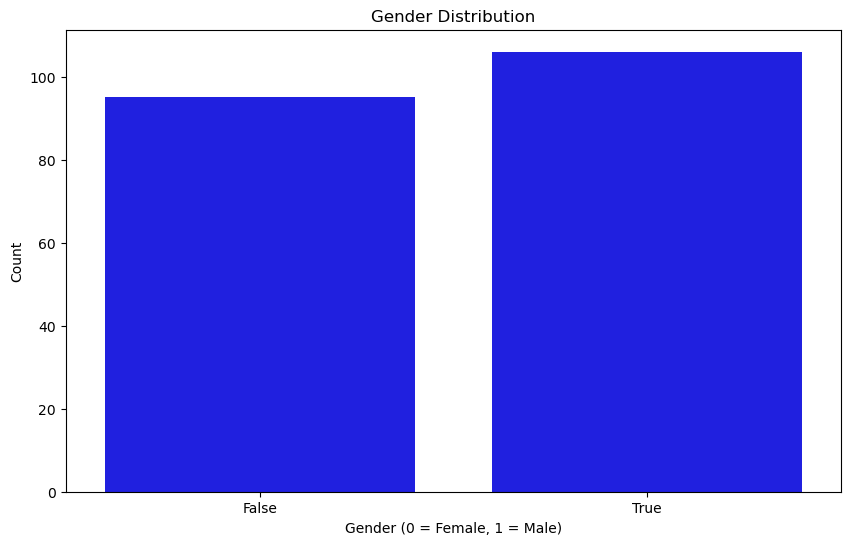

In [21]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sex_male', data=titanic_data,color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

Passenger Class Distribution
   Objective-Show the distribution of passengers across different classes (1st, 2nd, 3rd class).
   Observation-The count plot highlights how many passengers were in each class. This information is useful to see the socioeconomic status of the        passengers and how it might relate to survival rates.

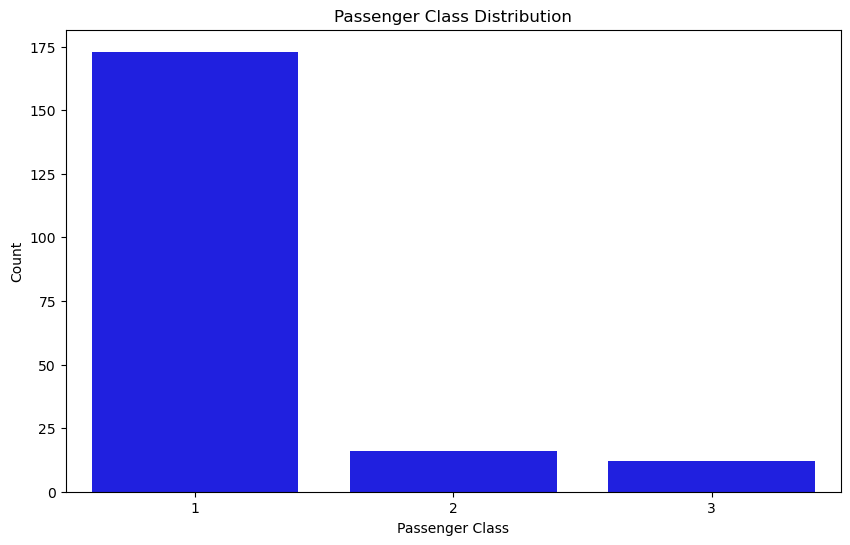

In [23]:
# Passenger Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', data=titanic_data,color='blue')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Embarkation Points
   Objective-Visualize the number of passengers who embarked from different points, focusing on Southampton.
   Observation-The count plot indicates the number of passengers who boarded the Titanic at different ports. Southampton had the highest number of         passengers.

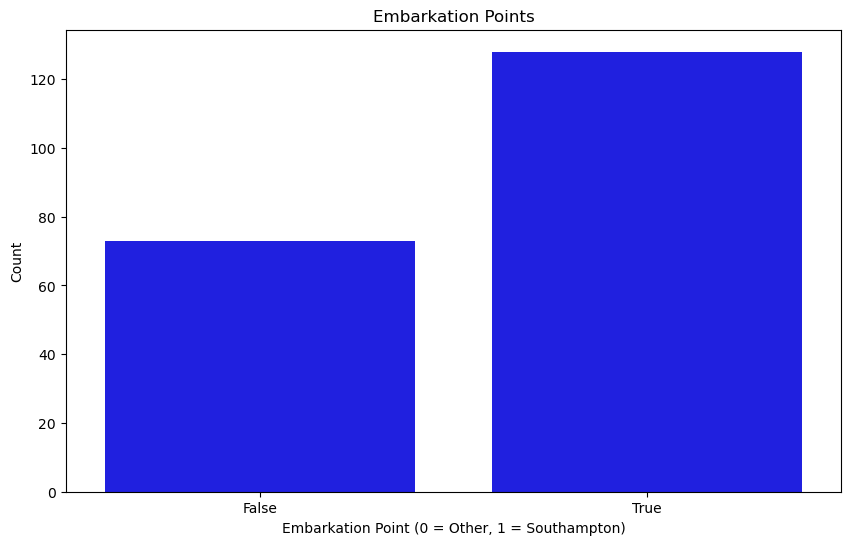

In [24]:
# Embarkation Points
plt.figure(figsize=(10, 6))
sns.countplot(x='embarked_S', data=titanic_data,color='blue')
plt.title('Embarkation Points')
plt.xlabel('Embarkation Point (0 = Other, 1 = Southampton)')
plt.ylabel('Count')
plt.show()


Fare Distribution
   Objective-Show the distribution of fares paid by passengers.
   Observation-The histogram shows how fares are distributed. Most passengers paid lower fares, while a few paid significantly higher fares. This can      be related to the passenger class and the facilities they opted for.

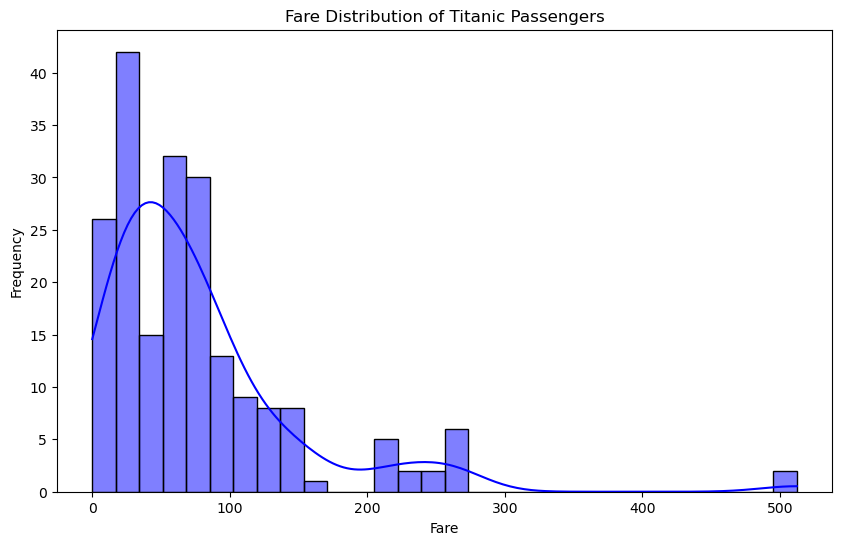

In [25]:
# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['fare'], bins=30, kde=True,color="blue")
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

Pairplot of Selected Features
   Objective-Visualize relationships between multiple features such as age, fare, and passenger class.
   Observation-Pairplots help in understanding the interactions between numerical features. They can show potential correlations or trends, such as        older passengers paying higher fares or the age distribution across classes.

<Figure size 1200x800 with 0 Axes>

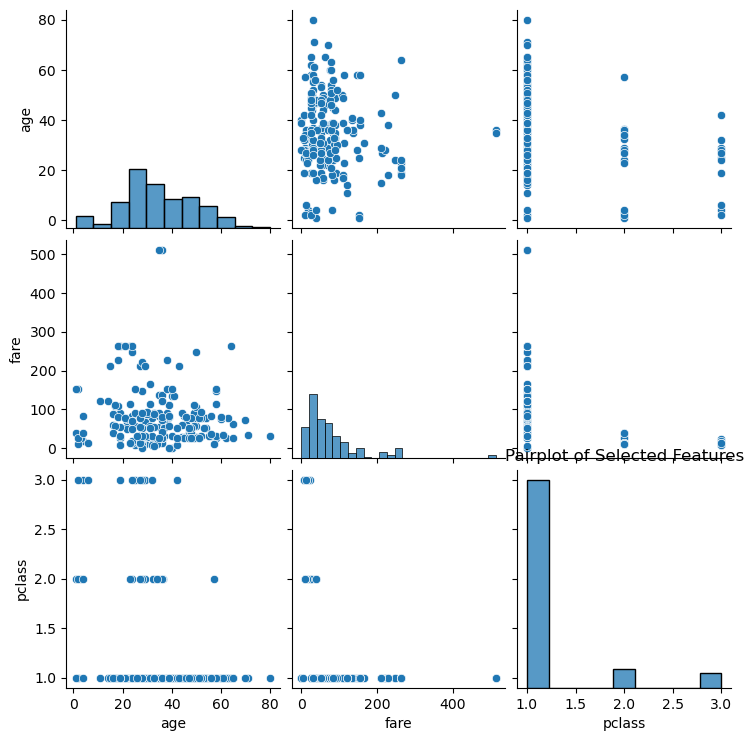

In [27]:
# Pairplot of Selected Features
plt.figure(figsize=(12, 8))
sns.pairplot(titanic_data[['age', 'fare', 'pclass']])
plt.title('Pairplot of Selected Features')
plt.show()


Age vs Fare
   Objective-Analyze the relationship between passengers' age and the fare they paid.
   Observation-The scatter plot shows if there is any pattern between age and fare. For instance, it might show that younger passengers tended to pay      lower fares or there is a wide spread across all ages.

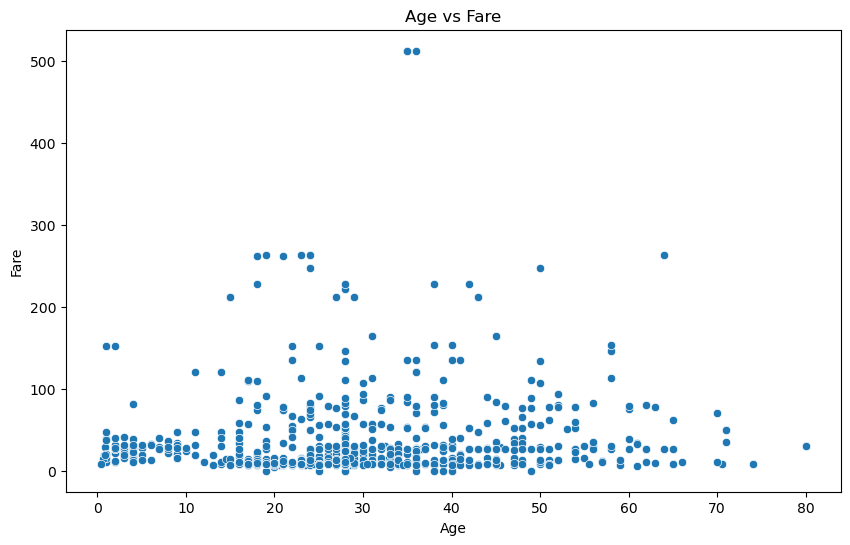

In [13]:
# Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=titanic_data)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


Passenger Class vs Fare
   Objective-Show the distribution of fares within each passenger class.
   Observation-The box plot indicates the range and median fare within each class. First-class passengers generally paid higher fares compared to          second and third-class passengers.

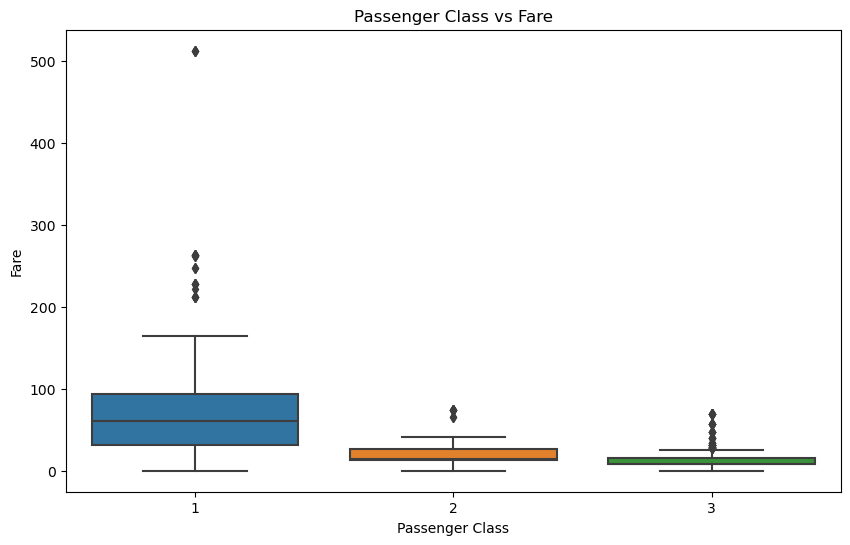

In [14]:
# Passenger Class vs Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=titanic_data)
plt.title('Passenger Class vs Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


Conclusion
      This project provided a comprehensive exploratory data analysis (EDA) and visualization of the Titanic dataset. Through data cleaning, visualization, and analysis, we gained insights into the demographic and socioeconomic characteristics of the passengers. The visualizations highlighted key relationships and patterns within the data, laying the groundwork for further analysis and predictive modeling. Moving forward, we can enhance the analysis with feature engineering, advanced visualizations, and predictive modeling to derive even more valuable insights from the dataset.